# Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


/tmp/ipykernel_4268/1527089217.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Loading the Dataset

In [2]:
data = pd.read_csv("./data/Github Repo Dataset.csv")
data.shape


(215029, 24)

In [3]:
data.head()


Name  \
0                 freeCodeCamp   
1       free-programming-books   
2                      awesome   
3                      996.ICU   
4  coding-interview-university   

                                         Description  \
0  freeCodeCamp.org's open-source codebase and cu...   
1         :books: Freely available programming books   
2  😎 Awesome lists about all kinds of interesting...   
3  Repo for counting stars and contributing. Pres...   
4  A complete computer science study plan to beco...   

                                                 URL            Created At  \
0       https://github.com/freeCodeCamp/freeCodeCamp  2014-12-24T17:49:19Z   
1  https://github.com/EbookFoundation/free-progra...  2013-10-11T06:50:37Z   
2            https://github.com/sindresorhus/awesome  2014-07-11T13:42:37Z   
3                  https://github.com/996icu/996.ICU  2019-03-26T07:31:14Z   
4  https://github.com/jwasham/coding-interview-un...  2016-06-06T02:34:12Z   

             Updated At                                           Homepage  \
0  2023-09-21T11:32:33Z                http://contribute.freecodecamp.org/   
1  2023-09-21T11:09:25Z  https://ebookfoundation.github.io/free-program...   
2  2023-09-21T11:18:22Z                                                NaN   
3  2023-09-21T08:09:01Z                                    https://996.icu   
4  2023-09-21T10:54:48Z                                                NaN   

     Size   Stars  Forks  Issues  ...  Has Issues Has Projects Has Downloads  \
0  387451  374074  33599     248  ...        True         True          True   
1   17087  298393  57194      46  ...        True        False          True   
2    1441  269997  26485      61  ...        True        False          True   
3  187799  267901  21497   16712  ...       False        False          True   
4   20998  265161  69434      56  ...        True        False          True   

  Has Wiki  Has Pages  Has Discussions  Is Fork  Is Archived  Is Template  \
0    False       True            False    False        False        False   
1    False       True            False    False        False        False   
2    False       True            False    False        False        False   
3    False      False            False    False         True        False   
4    False      False            False    False        False        False   

   Default Branch  
0            main  
1            main  
2            main  
3          master  
4            main  

[5 rows x 24 columns]

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215029 entries, 0 to 215028
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Name             215027 non-null  object
 1   Description      206997 non-null  object
 2   URL              215029 non-null  object
 3   Created At       215029 non-null  object
 4   Updated At       215029 non-null  object
 5   Homepage         78390 non-null   object
 6   Size             215029 non-null  int64 
 7   Stars            215029 non-null  int64 
 8   Forks            215029 non-null  int64 
 9   Issues           215029 non-null  int64 
 10  Watchers         215029 non-null  int64 
 11  Language         198953 non-null  object
 12  License          161990 non-null  object
 13  Topics           215029 non-null  object
 14  Has Issues       215029 non-null  bool  
 15  Has Projects     215029 non-null  bool  
 16  Has Downloads    215029 non-null  bool  
 17  Has Wiki  

In [5]:
data.describe(include='int64').T


count          mean            std    min    25%     50%  \
Size      215029.0  54282.700106  702397.849095    0.0  378.0  2389.0   
Stars     215029.0   1115.085142    3992.372050  167.0  237.0   377.0   
Forks     215029.0    234.207637    1242.967451    0.0   39.0    79.0   
Issues    215029.0     37.925178     196.508610    0.0    3.0    10.0   
Watchers  215029.0   1115.085142    3992.372050  167.0  237.0   377.0   

              75%          max  
Size      15282.0  105078627.0  
Stars       797.0     374074.0  
Forks       174.0     243339.0  
Issues       28.0      26543.0  
Watchers    797.0     374074.0

In [6]:
print("The Number of Duplicated Data:", data.duplicated().sum())


The Number of Duplicated Data: 0


In [7]:
temp = data.isna().sum().sort_values(ascending=False)
temp = temp[temp.values > 0]
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=temp.index,
        y=temp.values,
        text=temp.values,

    )
)
fig.update_layout(
    template='plotly_dark',
    title=''

)
fig.show()


In [17]:
# data.dropna(inplace=True)
# data.shape
drop_elements = []

In [9]:
sample = data.sample(frac=.25, random_state=100).reset_index(
    drop=True)  # drop: Old Indexes are not added as a feature
df = sample.copy()
df.head()


Name  \
0                     hardh264   
1  subtle-patterns-bookmarklet   
2             PyTorch_Tutorial   
3                     not-perf   
4                      crocgui   

                                         Description  \
0  A hardware h264 video encoder written in VHDL....   
1                         SubtlePatterns Bookmarklet   
2                             《Pytorch模型训练实用教程》中配套代码   
3                  A sampling CPU profiler for Linux   
4                                       GUI for croc   

                                                 URL            Created At  \
0                https://github.com/bcattle/hardh264  2016-01-03T11:18:14Z   
1  https://github.com/bradjasper/subtle-patterns-...  2012-12-06T04:58:55Z   
2     https://github.com/TingsongYu/PyTorch_Tutorial  2018-12-04T14:12:31Z   
3                  https://github.com/koute/not-perf  2018-04-27T12:46:27Z   
4                  https://github.com/howeyc/crocgui  2021-02-14T01:03:29Z   

             Updated At                                           Homepage  \
0  2023-09-15T09:52:11Z                                                NaN   
1  2023-09-08T16:36:35Z  http://bradjasper.com/subtle-patterns-bookmark...   
2  2023-09-21T11:23:43Z                                                NaN   
3  2023-09-24T21:57:09Z                                                NaN   
4  2023-09-19T08:09:35Z                                                NaN   

     Size  Stars  Forks  Issues  ...  Has Issues Has Projects Has Downloads  \
0     390    244     64       7  ...        True         True          True   
1   18801    298     37       3  ...        True         True          True   
2   16156   6831   1669      30  ...        True         True          True   
3  101807    824     36      22  ...        True         True          True   
4   36651    207     21      11  ...        True         True          True   

  Has Wiki  Has Pages  Has Discussions  Is Fork  Is Archived  Is Template  \
0     True      False            False    False        False        False   
1     True       True            False    False        False        False   
2     True      False            False    False        False        False   
3     True      False            False    False        False        False   
4     True      False            False    False        False        False   

   Default Branch  
0          master  
1        gh-pages  
2          master  
3          master  
4          master  

[5 rows x 24 columns]

In [14]:
df.size

1290168

In [10]:
df.describe().T


count          mean            std    min    25%     50%      75%  \
Size      53757.0  54338.133248  703297.714994    0.0  377.0  2426.0  15394.0   
Stars     53757.0   1140.322395    3962.885214  167.0  236.0   378.0    803.0   
Forks     53757.0    237.745112    1111.730262    0.0   39.0    79.0    174.0   
Issues    53757.0     36.731793     158.560693    0.0    3.0    10.0     28.0   
Watchers  53757.0   1140.322395    3962.885214  167.0  236.0   378.0    803.0   

                 max  
Size      93317358.0  
Stars       217627.0  
Forks        88940.0  
Issues       19666.0  
Watchers    217627.0

# Handling Missing Values

Features with null values
- Homepage
- License
- Language
- Description
- Name

In [16]:
df[['Homepage']].sample(10)


Homepage
48275                                        NaN
26553                                        NaN
4417              https://docs.walletconnect.com
49922                                        NaN
1102                                         NaN
44223                                        NaN
32051                                        NaN
21822                                        NaN
30523  https://pypi.python.org/pypi/line-bot-sdk
43831                                        NaN

In [15]:
print("Number of Missing Values in 'Homepage': ", df['Homepage'].isna().sum())


Number of Missing Values in 'Homepage':  34095


This feature seem to contain the link of website related to github repo.

> Reason to Drop This Features
>
> - Missing values will be needed to be filled using web scraping, which is time consuming.
> - The number of missing values are too large
> - I know the popularity of an organization definitely affect the popularity of the repo and we can find that using these link. 
>    But doing such a thing feel beyond my current skills and project requirements 

In [18]:
df[['License']].head(10)


License
0  NOASSERTION
1          MIT
2          NaN
3   Apache-2.0
4          ISC
5          MIT
6   Apache-2.0
7          MIT
8      GPL-3.0
9      GPL-3.0

In [25]:
print("Number of Missing Values in 'License': ", int(df['License'].isna().sum()))


Number of Missing Values in 'License':  13208


In [28]:
df[['Description']].head()


Description
0  A hardware h264 video encoder written in VHDL....
1                         SubtlePatterns Bookmarklet
2                             《Pytorch模型训练实用教程》中配套代码
3                  A sampling CPU profiler for Linux
4                                       GUI for croc

In [36]:
print("Number of Missing Values in 'Description': ", int(df['Description'].isna().sum()))


Number of Missing Values in 'Description':  1988


In [ ]:
df[['Language']].head(10)

Language
0          VHDL
1  CoffeeScript
2        Python
3          Rust
4            Go
5   Objective-C
6           Vue
7          Ruby
8   Mathematica
9           C++

In [35]:
print("Number of Missing Values in 'Language': ", int(df['Language'].isna().sum()))


Number of Missing Values in 'Language':  4092


> Reason to drop this features:

> Reason To Drop This Feature:
> - Contains text data, which will require totally separate set of operations
> - I won't use it for analysis and cannot be replaced or filled
> - Only Very Small Of Missing Values

In [34]:
df[['Name']].isna().sum()


Name    0
dtype: int64

> Reason To Drop This Feature:


In [ ]:
drop_elements.append('Name')


# Outliers

In [171]:
df.drop(['Name', 'Description', 'License', 'URL',
        'Homepage', 'Default Branch','Language'], axis=1, inplace=True)
# df.drop('Default Branch',axis=True, inplace=True)


In [176]:
df.isna().sum()

Created At         0
Updated At         0
Size               0
Stars              0
Forks              0
Issues             0
Watchers           0
Topics             0
Has Issues         0
Has Projects       0
Has Downloads      0
Has Wiki           0
Has Pages          0
Has Discussions    0
Is Fork            0
Is Archived        0
Is Template        0
dtype: int64

In [177]:
df.columns


Index(['Created At', 'Updated At', 'Size', 'Stars', 'Forks', 'Issues',
       'Watchers', 'Topics', 'Has Issues', 'Has Projects', 'Has Downloads',
       'Has Wiki', 'Has Pages', 'Has Discussions', 'Is Fork', 'Is Archived',
       'Is Template'],
      dtype='object')

In [178]:
df.head()


Created At            Updated At    Size  Stars  Forks  Issues  \
0  2016-01-03T11:18:14Z  2023-09-15T09:52:11Z     390    244     64       7   
1  2012-12-06T04:58:55Z  2023-09-08T16:36:35Z   18801    298     37       3   
2  2018-12-04T14:12:31Z  2023-09-21T11:23:43Z   16156   6831   1669      30   
3  2018-04-27T12:46:27Z  2023-09-24T21:57:09Z  101807    824     36      22   
4  2021-02-14T01:03:29Z  2023-09-19T08:09:35Z   36651    207     21      11   

   Watchers                                             Topics  Has Issues  \
0       244                                                 []        True   
1       298  ['bookmarklet', 'design-tools', 'subtlepattern...        True   
2      6831                                                 []        True   
3       824                                                 []        True   
4       207  ['android', 'cross-platform', 'file-sharing', ...        True   

   Has Projects  Has Downloads  Has Wiki  Has Pages  Has Discussions  Is Fork  \
0          True           True      True      False            False    False   
1          True           True      True       True            False    False   
2          True           True      True      False            False    False   
3          True           True      True      False            False    False   
4          True           True      True      False            False    False   

   Is Archived  Is Template  
0        False        False  
1        False        False  
2        False        False  
3        False        False  
4        False        False

In [179]:
for d in df.select_dtypes('int64'):
    fig = px.box(
        x=df[d],
    )
    fig.update_layout(
        title=d
    )
    fig.show()


In [180]:
def remove_outliers(dataFrame, col):
    Q1 = dataFrame[col].quantile(0.25)
    Q3 = dataFrame[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    if dataFrame[col].dtype == 'int64':
        lower_fence, upper_fence = int(lower_fence), int(upper_fence)

    outliers = dataFrame[col].where(
        (dataFrame[col] < lower_fence) & (dataFrame[col] > upper_fence))

    status = 'Removed'
    try:
        for i, d in dataFrame.iterrows():
            if d[col] < lower_fence:
                df.at[i, col] = lower_fence
            elif d[col] > upper_fence:
                df.at[i, col] = upper_fence
    except:
        status = 'Not Removed'
    finally:
        print(f"{col:<10}{outliers.size:^10}{status:>10}")


In [181]:
print(f"{'Column':<10}{'Outliers':^10}{'Status':>10}")
for c in df.select_dtypes(['int64', 'float64']):
    remove_outliers(df, c)


Column     Outliers     Status
Size        53757      Removed
Stars       53757      Removed
Forks       53757      Removed
Issues      53757      Removed
Watchers    53757      Removed


In [182]:
for d in df.select_dtypes(['int64', 'float64']):
    fig = px.box(
        x=df[d],
        orientation='h'
    )
    fig.update_layout(
        title=d
    )
    fig.show()


# Extraction If Any

# Exploring Categorical Variable

In [183]:
df.select_dtypes('object')


Created At            Updated At  \
0      2016-01-03T11:18:14Z  2023-09-15T09:52:11Z   
1      2012-12-06T04:58:55Z  2023-09-08T16:36:35Z   
2      2018-12-04T14:12:31Z  2023-09-21T11:23:43Z   
3      2018-04-27T12:46:27Z  2023-09-24T21:57:09Z   
4      2021-02-14T01:03:29Z  2023-09-19T08:09:35Z   
...                     ...                   ...   
53752  2017-12-27T14:56:00Z  2023-09-25T09:24:13Z   
53753  2018-07-17T01:23:37Z  2023-09-25T09:06:01Z   
53754  2018-02-06T07:26:15Z  2023-09-23T15:03:30Z   
53755  2018-10-24T07:26:37Z  2023-09-20T09:39:45Z   
53756  2019-02-03T03:40:32Z  2023-09-21T00:44:12Z   

                                                  Topics  
0                                                     []  
1      ['bookmarklet', 'design-tools', 'subtlepattern...  
2                                                     []  
3                                                     []  
4      ['android', 'cross-platform', 'file-sharing', ...  
...                                                  ...  
53752  ['aac', 'audio-book-converter', 'ffmpeg', 'ibo...  
53753                                                 []  
53754  ['documentation', 'http', 'http3', 'quic', 'tr...  
53755                                                 []  
53756                                                 []  

[53757 rows x 3 columns]

In [184]:
# ? Convert date to datetime and extract `year`
df['Created At'] = pd.to_datetime(df['Created At'])
df['Updated At'] = pd.to_datetime(df['Updated At'])


In [185]:
df['CreatedYear'] = pd.DatetimeIndex(df['Created At']).year
df['UpdatedYear'] = pd.DatetimeIndex(df['Created At']).year


In [186]:
df.select_dtypes('object')


Topics
0                                                     []
1      ['bookmarklet', 'design-tools', 'subtlepattern...
2                                                     []
3                                                     []
4      ['android', 'cross-platform', 'file-sharing', ...
...                                                  ...
53752  ['aac', 'audio-book-converter', 'ffmpeg', 'ibo...
53753                                                 []
53754  ['documentation', 'http', 'http3', 'quic', 'tr...
53755                                                 []
53756                                                 []

[53757 rows x 1 columns]

## Languages

In [187]:
df['Language'].nunique()


KeyError: 'Language'

In [21]:
count_lang = df['Language'].value_counts().sort_values(ascending=False)
px.bar(x=count_lang.index[0:30], y=count_lang[0:30])


In [38]:
# popular_languages = count_lang[count_lang.values >= df.size * 0.01].index #empty return

popular_languages = {}
popular_languages['most'] = count_lang[count_lang.values >= 1000].index
popular_languages['moderate'] = count_lang[(
    count_lang.values < 1000) & (count_lang >= 500)].index
popular_languages['least'] = count_lang[count_lang.values < 500].index
print(popular_languages)


{'most': Index(['JavaScript', 'Python', 'TypeScript', 'Java', 'Go', 'C++', 'PHP', 'C'], dtype='object', name='Language'), 'moderate': Index(['HTML', 'C#', 'Ruby', 'Rust', 'Shell'], dtype='object', name='Language'), 'least': Index(['Swift', 'CSS', 'Jupyter Notebook', 'Vue', 'Kotlin', 'Objective-C',
       'Dart', 'R', 'Scala', 'SCSS',
       ...
       'Janet', 'Brightscript', 'ooc', 'Chapel', 'Boogie', 'Ren'Py', 'ABAP',
       'Metal', 'Red', 'D2'],
      dtype='object', name='Language', length=208)}


In [40]:
for i, d in df.iterrows():
    for k in popular_languages.keys():
        if d['Language'] in popular_languages[k]:
            df.at[i, 'PopularLang'] = k


In [43]:
df[['Language', 'PopularLang']].sample(6)


Language PopularLang
2810   Jupyter Notebook       least
26902               C++        most
22583        JavaScript        most
16627        JavaScript        most
22992            Python        most
12572                Go        most

## Topics

In [188]:
df['Topics'].nunique()


27970

In [195]:
df[['Topics']].value_counts().sort_values(ascending=False)


Topics                                                                                       
[]                                                                                               25265
['hacktoberfest']                                                                                  115
['python']                                                                                          14
['component', 'php', 'symfony', 'symfony-component']                                                11
['javascript']                                                                                      11
                                                                                                 ...  
['x11', 'x11-cursor', 'xinput']                                                                      1
['x64dbg', 'x64dbg-plugin']                                                                          1
['xamarin', 'xamarin-android', 'xamarin-forms', 'xamarin-ios', 'xamarin-mac']     

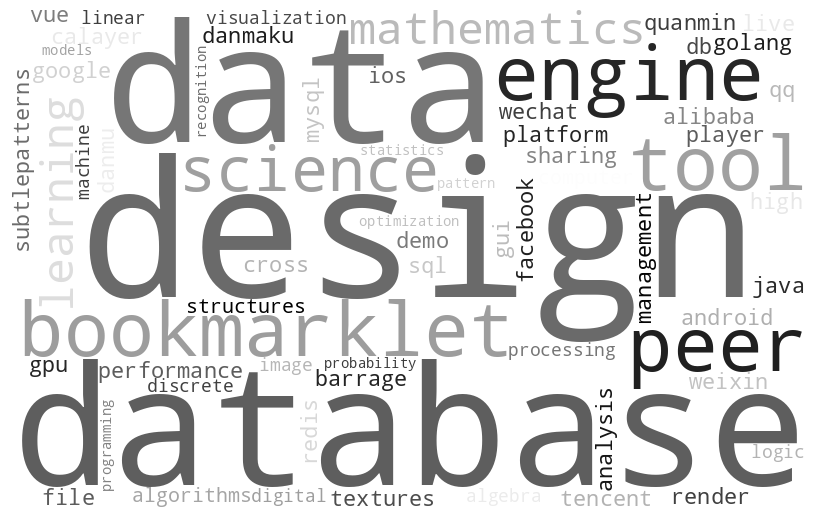

In [198]:
from ast import literal_eval
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

words = ''
stopwords = set(STOPWORDS)

for i, d in df.iterrows():
    for w in literal_eval(d['Topics']):
        words += w + " "
    if i == 10:
        break

word_cloud = WordCloud(
    background_color='white', colormap='binary',
    width=800, height=500,
    stopwords=stopwords).generate(words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [138]:
df.drop('Topics', axis = 1, inplace=True)

# Encoding

# How the data looks right now ?

In [141]:
df.shape

(31117, 20)